In [1]:
import torch
import torch.nn.functional as F
torch.set_printoptions(precision=None, threshold=None, edgeitems=5, linewidth=None, profile=None, sci_mode=None)

from torch_geometric.nn import GCNConv
from torch_geometric.data import Data
from torch_geometric.utils import to_networkx
import networkx as nx

import sys
sys.path.insert(0, '/Users/nicibe/PythonFunctions')
from prinfo import prinfo

/Users/nicibe/miniforge3/envs/pytorch-geometric/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Playground

In [2]:
x = torch.tensor([[-1], [0], [1]], dtype=torch.float)

edge_index = torch.tensor(
    [[0, 1, 1, 2],
    [1, 0, 2, 1]], dtype=torch.long)

data = Data(x=x, edge_index=edge_index)

prinfo(data.keys)
prinfo(data['x'])
prinfo(data['edge_index'])

data.keys = ['edge_index', 'x']

data['x'] = 
tensor([[-1.],
        [ 0.],
        [ 1.]])

data['edge_index'] = 
tensor([[0, 1, 1, 2],
        [1, 0, 2, 1]])



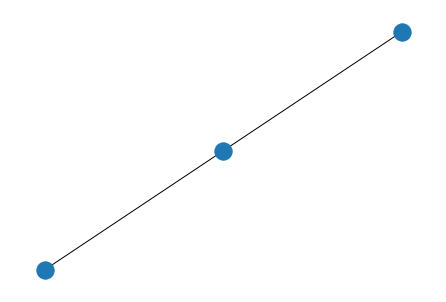

In [3]:
g = to_networkx(data, to_undirected=True)
nx.draw(g)

# Example

In [4]:
from torch_geometric.datasets import Planetoid

dataset = Planetoid(root='/tmp/Cora', name='Cora')
data = dataset[0]

Processing...
Done!


In [5]:
prinfo(data)

data = Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708])



In [6]:
print('======================')
print(f'Number of graphs: {len(dataset)}')
print(f'Number of features: {dataset.num_features}')
print(f'Number of classes: {dataset.num_classes}')

print(f'Number of nodes: {data.num_nodes}')
print(f'Number of edges: {data.num_edges}')
print(f'Average node degree: {data.num_edges / data.num_nodes:.2f}')
print(f'Number of training nodes: {data.train_mask.sum()}')
print(f'Training node label rate: {int(data.train_mask.sum()) / data.num_nodes:.2f}')
print(f'Contains isolated nodes: {data.has_isolated_nodes()}')
print(f'Contains self-loops: {data.has_self_loops()}')
print(f'Is undirected: {data.is_undirected()}')
print('======================')

Number of graphs: 1
Number of features: 1433
Number of classes: 7
Number of nodes: 2708
Number of edges: 10556
Average node degree: 3.90
Number of training nodes: 140
Training node label rate: 0.05
Contains isolated nodes: False
Contains self-loops: False
Is undirected: True


In [7]:
import pandas as pd
data_pandas = pd.DataFrame(data.x.numpy())

In [8]:
data_pandas

,0,1,2,3,4,5,6,7,8,9,...,1423,1424,1425,1426,1427,1428,1429,1430,1431,1432
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2703,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2704,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2705,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2706,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
data.__dict__['_store']

{'x': tensor([[0., 0., 0., 0., 0.,  ..., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.,  ..., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.,  ..., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.,  ..., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0.,  ..., 0., 0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0., 0.,  ..., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0.,  ..., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.,  ..., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.,  ..., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.,  ..., 0., 0., 0., 0., 0.]]), 'edge_index': tensor([[   0,    0,    0,    1,    1,  ..., 2706, 2707, 2707, 2707, 2707],
        [ 633, 1862, 2582,    2,  652,  ..., 2707,  165,  598, 1473, 2706]]), 'y': tensor([3, 4, 4, 0, 3,  ..., 3, 3, 3, 3, 3]), 'train_mask': tensor([ True,  True,  True,  True,  True,  ..., False, False, False, False,
        False]), 'val_mask': tensor([False, False, False, False, False,  ..., False, False, False, False,
   

In [10]:
class GCN(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = GCNConv(dataset.num_node_features, 16)
        self.conv2 = GCNConv(16, dataset.num_classes)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index

        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, training=self.training)
        x = self.conv2(x, edge_index)

        return F.log_softmax(x, dim=1)

In [11]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = GCN().to(device)
data = dataset[0].to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)

model.eval()
pred = model(data).argmax(dim=1)
correct = (pred[data.test_mask] == data.y[data.test_mask]).sum()
acc = int(correct) / int(data.test_mask.sum())
print(f'Accuracy: {acc:.4f}')

Accuracy: 0.7930
